<font font color='red' size="6"> **IV/Sentiment analysis (Rule-based approach with subjectivity- polarity)** </font>

In [19]:
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
from datetime import datetime
import seaborn as sns
from PIL import Image
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt


In [20]:
#Importing the dataframe
data = pd.read_csv(os.getcwd() + '/data/' + '/Final_Data.csv')
data

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,word_way,word_week,word_white,word_win,word_wins,word_world,word_year,word_years,word_yes,dt_date
0,thekumachan,n.a,Kamala Harris Knows How to Win Contest\nhttps:...,23,60,4218,2009-08-21 22:01:59,2020-10-26 23:00:31,0,"['2020campaign', '2020election', 'amateur', 'b...",...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
1,2020Followers,washington d.c.,"realDonaldTrump gained 3,412 Twitter followers...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
2,2020Followers,washington d.c.,"JoeBiden gained 11,515 Twitter followers in th...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
3,2020Followers,washington d.c.,"Mike_Pence gained 1,684 Twitter followers in t...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
4,2020Followers,washington d.c.,"KamalaHarris gained 7,302 Twitter followers in...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20154,ByDionne,n.a,💚🙌😀🥳😇🙏Let's Win This!! #VoteEarly #VOTE Let's...,2961,1743,10803,2012-05-07 12:29:39,2020-10-26 21:02:58,0,"['voteearly', 'vote']",...,0.0,0.0,0.0,0.455499,0.0,0.0,0.0,0.0,0.0,2020-10-26
20155,Iamjasbirkaur,"olney, md",Saving democracy! \n#VOTE #VoteHimOut2020 #Vot...,622,359,3432,2014-07-19 15:43:08,2020-10-26 21:02:56,0,"['vote', 'votehimout2020', 'votebidenharris2020']",...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
20156,enelson6,n.a,@CornynResponse @JohnCornyn @mjhegar #Vote @mj...,1057,413,21866,2009-01-02 12:22:53,2020-10-26 21:02:54,0,['vote'],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
20157,ethannichtern,n.a,Happiness: Noun. \n\nThat feeling where you ar...,939,13441,27261,2009-03-11 21:56:10,2020-10-26 21:02:53,1,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26


<font font color='blue' size="5"> **No. of Positive Sentiments vs No. of Negative Sentiments** </font>


Next, we look at what is the overall distribution of positive and negative tweets. Based on the SentimentIntensityAnalyzer from the NLTK Vader-Lexicon library, this analyzer examines the sentiment of a sentence, on how positive neutral or negative it is. Since it is cirumstancial to the parties/ candidates, it would be better to do a seperate analysis in the end to know who is the target of the negative and positive connotations. 

The analyzer returns 4 scores for each sentence (positive, negative, neutral, compound). The score "compound" is the overal sentiment of the sentence in range [-1, 1]. For now, we want to classify each tweets into 5 different empition and assign a range of values for each of them: 
1. Very positive '5' - [0.55, 1.00]
2. Positive '4' - [0.10, 0.55)
3. Neutral '3' - (-0.10, 0.10)
4. Negative '2' - (-0.55, -0.10]
5. Very negative '1' - [-1.00, -0.55] 


In [21]:
# Focus on the "compound" scores 
#Create a new column called "sentiment_class"
sentimentclass_list = []

for i in range(0, len(data)):
    #current 'compound' score:
    curr_compound = data.iloc[i,:]['compound']
    
    if (curr_compound >= 0.55 and curr_compound <= 1.0 ):
        sentimentclass_list.append(5)
    elif (curr_compound >= 0.10 and curr_compound < 0.55 ):
        sentimentclass_list.append(4)
    elif (curr_compound > -0.10 and curr_compound < 0.10 ):
        sentimentclass_list.append(3)
    elif (curr_compound > -0.55 and curr_compound <= -0.10 ):
        sentimentclass_list.append(2)
    elif (curr_compound >= -1.0 and curr_compound <= -0.55 ):
        sentimentclass_list.append(1)
        
        
#Add the new column 'sentiment_class' to the dataframe 
data['sentiment_class'] = sentimentclass_list

#Check the new column
data.tail(10)['sentiment_class']

20149    3
20150    3
20151    3
20152    3
20153    5
20154    5
20155    3
20156    3
20157    5
20158    3
Name: sentiment_class, dtype: int64

In [22]:
#Verify if the classification assignment is correct 
data.iloc[0:10,:][['compound', 'sentiment_class']]

,compound,sentiment_class
0,0.5859,5
1,0.5994,5
2,0.5994,5
3,0.5994,5
4,0.5994,5
5,0.4404,4
6,0.0000,3
7,-0.5267,2
8,0.7506,5
9,-0.4588,2


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


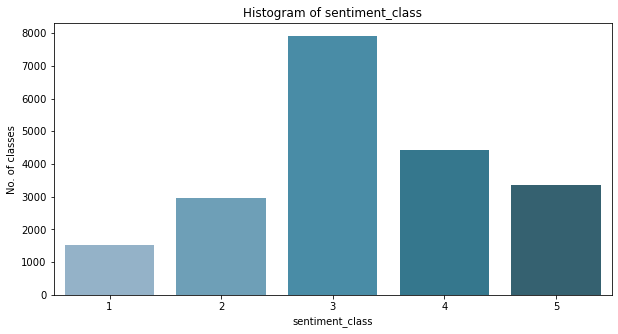

In [7]:
# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.countplot(data['sentiment_class'])
plt.title('Histogram of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [31]:
#Display full text: 
pd.set_option('display.max_colwidth', -2)

#Look at some example of negative, neutral and positive tweets

#Filter 5 negative tweets: 
print("10 random negative tweets and sentiment classes:")
data[(data['sentiment_class'] == 1) | (data['sentiment_class'] == 2)].sample(n=10)[['Tweet', 'sentiment_class']]

5 random negative tweets and sentiment classes:


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Tweet,sentiment_class
14379,Latest opinion poll averages for #Donald #Trump and #JoeBiden in each of the 6 key battleground states of the 2020… https://t.co/Ea3DTnCK24,2
67,Have questions about how to submit your absentee ballot? Need to ask a question about your voter registration statu… https://t.co/GRhMB3vXBB,2
18366,Coming Soon to The Debating Times;\n\nWith the clock counting down to a damaging No Deal Brexit and a winter Covid cr… https://t.co/NzbCu5ydKR,2
4456,@MikeVanriel2 The hell of it is that Trump will still have his cult of idolators and corrupt Republican legislators… https://t.co/aFHqYC4xbw,1
22589,It is time to cease the fear mongering and open up the country and get EVERYONE back to work. @BorisJohnson if the… https://t.co/XXOMyoVX8y,1
7228,"@tamrobinson1966 If #Liberal Toronto voters drop another liberal candidate in position in bye Elections, then they… https://t.co/cuEmpEya2o",2
895,those people are really ugly under all the make up and surgery #HuntersLapTop #HunterBiden #2020Election #democats… https://t.co/rGr6X6QTdj,1
3993,@BarackObama It is really quite sad that an ex-president has to get involved in the #USElection2020 and it's even w… https://t.co/0J2hTqZTyv,1
19673,"COVID-19 is real, but the panic narrative that's been woven around it is entirely manufactured. The panic #politics… https://t.co/ckroaokuEQ",1
24441,"""We're supposed to be outraged because Amy Coney Barrett believes in life and we're not supposed to be outraged tha… https://t.co/OdSSQbi3BC",1


In [34]:
#Filter 10 neutral tweets: 
print("10 random neutral tweets and sentiment classes:")
data[(data['sentiment_class'] == 3)].sample(n=10)[['Tweet', 'sentiment_class']]

10 random neutral tweets and sentiment classes:


,Tweet,sentiment_class
11351,#Mail-in #voting is an option this year for more American #voters than ever. But the rules depend on where you live… https://t.co/WfazXXs0Oj,3
28612,Our workshop is tomorrow at 2pm ET!! This won’t be your run of a mill poll working workshop either. You won’t want… https://t.co/jHzHTuxrDB,3
10954,I cast my #vote today for #BidenHarris2020! #BidenHarrisLandslide2020 #BidenHarris2020Landslide #2020Election… https://t.co/RdV0DhURBp,3
8828,Joe on fracking #Biden #election https://t.co/3uqlNSoVqI,3
10507,Should Investors Prepare for the Likelihood of Post-Election Unrest? https://t.co/vddOeAlMJo @Alemid #investors… https://t.co/Wq5vR0vkZb,3
11263,"Oct. 24, 1960 - In Pittsburgh last night, Vice President Nixon decried Mr. Kennedy's ""silly and immature suggestion… https://t.co/PDM2ciVWcV",3
28397,"Rock the #vote, keep the #faith! https://t.co/E6sM8P9hsO",3
2695,⚠️7 Steps for Judging Candidates ⚠️ \nAre you registered to vote? Next up - How to Judge a Candidate. The 7 steps we… https://t.co/yXhb0RMDyS,3
2056,.@McAllenISD high schools. @ACHIEVE_MISD is in the lead!!\n#RGV #2020election #mcallentx https://t.co/T2z29xJdeR,3
19711,The way politicians (of every color) are using the virus to bring ahead their own ideologies and agenda and go agai… https://t.co/qTh4DU4QKp,3


In [37]:
#Filter 10 positive tweets: 
print("10 random positive tweets and sentiment classes:")
data[(data['sentiment_class'] == 4) | (data['sentiment_class'] == 5)].sample(n=10)[['Tweet', 'sentiment_class']]

10 random positive tweets and sentiment classes:


,Tweet,sentiment_class
13653,Felt so good to vote today #VOTE #VoteEarly #VoteEarlyDay #JoeBiden #KamalaHarris #BidenHarris @JoeBiden… https://t.co/p7XZ2GsCvV,4
2959,@poccrt @ksorbs Could very well be the #strategy. I tend to think #Biden and #KamalaHarris are #candidates the… https://t.co/LCivqxMHP8,4
21449,"""#POTUS News: #Trump top campaign adviser: 'The president wants to see every #Republican reelected' #News"": https://t.co/Pju4gF34SY",4
16003,Does this mean Warren has to support Trump now?\n😉 #Trump2020 #RedWave #MAGA https://t.co/RmiWqIEIdi,4
5737,The Search of Truth- without @realDonaldTrump none of us who served in VTNWar but came home to be spat on by those… https://t.co/3Rbkxz59oE,4
20268,"@JoeBiden Thank you.\nIt is not a political statement, #BlackLivesMatter.",4
19525,"@grahamctv OK, but is it possible that @JimWatsonOttawa changed his views due to lack of supporting date? It is po… https://t.co/hdDn38cOzh",4
25060,"@Patrici15767099 Some Entertainment Bosses had to inform #50cent that if he was endorsing #Trump , that he would h… https://t.co/vSw1XZyi1b",4
12448,#JoeBiden and his family made millions from #China under the table. For the sake of the United States of America...… https://t.co/DVr6jrE1u0,4
16971,Thank you @LindseyGrahamSC &amp; @realDonaldTrump for everything #MAGA #KAG #Trump2020 https://t.co/QZUlkGh7hy,4


It seems that the sentiment scores for sentences are quite accurate in capturing the sentiments of the tweets. From the examples above, we clearly saw that the negative and positive tweets all have emotion words that clearly indicate the perception about the particular subject or candidate. On the otherhand, 8/10 neutral tweets are news related with indifferent tones about the voting process information, accessment on the potential outcomes, etc.   

### ==> The exercise's conclusion is dratiscally different from that of Leowgriffin's on the rule-based/lexicon-based model such as the SentimentIntensityAnalzyer from VADER Lexicon library when he applied it for his HK's case study. It is noteworthy that the tweet's vocabulary is measured up agaainst a pre-defined dictionary of positive and negative words. So it is important to set the right aim before applying such analysis. In this exercise, instead of assigning a particular subject matter to a sentiment like positive = pro-police/BLM like Leowgriffin, we chose the objective approach in the beginning and created the wordcloud to see common words associated with the candidates. 

In [23]:
#Extract the useful columns 
cleaned_data = data[['User', 'cleaned_Tweet', 'sentiment_class']]
cleaned_data

,User,cleaned_Tweet,sentiment_class
0,thekumachan,kamala harris knows win contest\n\n\n,5
1,2020Followers,realdonaldtrump gained twitter followers last ...,5
2,2020Followers,joebiden gained twitter followers last hours i...,5
3,2020Followers,mike_pence gained twitter followers last hours...,5
4,2020Followers,kamalaharris gained twitter followers last hou...,5
...,...,...,...
20154,ByDionne,🥳let's win let's get back,5
20155,Iamjasbirkaur,saving democracy,3
20156,enelson6,john cornyn buy bending trumps family,3
20157,ethannichtern,happiness noun \n\nthat feeling text banking a...,5


In [24]:
# Turn the scores into sentiment
#Create a new column called "sentiment_class"
sentimentclass_translate = []

for i in range(0, len(cleaned_data)):
    #current 'sentimentscore' score:
    sentiment = cleaned_data.iloc[i,:]['sentiment_class']
    
    if (sentiment >=1 and sentiment < 3 ):
        sentimentclass_translate.append('negative')
    elif (sentiment == 3):
        sentimentclass_translate.append('neutral')
    elif (sentiment >3 and sentiment <= 5):
        sentimentclass_translate.append('positive')
        
        
#Add the new column 'sentiment_class' to the dataframe 
cleaned_data['sentiment'] = sentimentclass_translate

#Drop the 'sentiment_class' column the dataframe 
cleaned_data.drop(['sentiment_class'] , axis = 1, inplace = True)


#Check the new column
cleaned_data

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,User,cleaned_Tweet,sentiment
0,thekumachan,kamala harris knows win contest\n\n\n,positive
1,2020Followers,realdonaldtrump gained twitter followers last ...,positive
2,2020Followers,joebiden gained twitter followers last hours i...,positive
3,2020Followers,mike_pence gained twitter followers last hours...,positive
4,2020Followers,kamalaharris gained twitter followers last hou...,positive
...,...,...,...
20154,ByDionne,🥳let's win let's get back,positive
20155,Iamjasbirkaur,saving democracy,neutral
20156,enelson6,john cornyn buy bending trumps family,neutral
20157,ethannichtern,happiness noun \n\nthat feeling text banking a...,positive


<font font color='red' size="6"> **V/ RoBERTa CNN** </font>

We are looking to train the roBERTa model to predict the sentiment (pos, neg, neu) from "Tweet". The cool thing about this is we can display what part of the text was influencial in deciding whether the text was positive, negative or neutral. Thus, this is an Unsupervised Learning task because we are learning which part of the sentence determine the sentiment

In [10]:
#Install this package first to use the 🤗 TRANSFORMERS
#pip install transformers command
#https://huggingface.co/transformers/_modules/transformers/modeling_tf_roberta.html

In [11]:
#Change the model to accept the Tensorflow 2.0.1
#pip install tensorflow

In [25]:
#Import additional libraries 
import tensorflow as tf 
import tensorflow.keras.backend as K 
from transformers import * 
import tokenizers 
import os
from sklearn.model_selection import train_test_split
from IPython.core.display import display, HTML
print('TensorFlow',tf.__version__)

TensorFlow 2.3.1


In [26]:
#Spliting the dataset into 
train, test = train_test_split(cleaned_data, test_size = 0.1)
train.head()

,User,cleaned_Tweet,sentiment
1998,talonlawgroup,please vote republican terrorists people getti...,negative
8156,Charterediv,us decide fate world rather results th…,neutral
17581,novascripts,still time vote early lines starting get longe...,neutral
6969,friend62,read british says minorities targeted social m...,neutral
6041,RemoveThatIdiot,let's gt;\n\n amp,positive


<font font color='blue' size="5"> **roBERTa Tokenization** </font>

In this part, we will create a variety of roBERTa inputs and target. 

In [33]:
MAX_LEN = 96
PATH = '/input/tf-roberta/'
tokenizer = tokenizers.ByteLevelBPETokenizer(
    vocab_file=PATH+'vocab-roberta-base.json', 
    merges_file=PATH+'merges-roberta-base.txt', 
    lowercase=True,
    add_prefix_space=True
)

TypeError: __init__() got an unexpected keyword argument 'vocab_file'

In [ ]:
sentiment_id = {'positive': , 'negative': , 'neutral': }
sentiment_tar = {'positive': , 'negative': , 'neutral': }
DO_QUES_ANS = False

In [ ]:
ct = train.shape[0]

#Inputs to roBERTa
ids = np.ones((ct, MAX_LEN), dtype ='int32')
att = np.zeros((ct, MAX_LEN), dtype = 'int32')
tok = np.zeros((ct, MAX_LEN), dtype = 'int32')


#Question answer targets 
tar1 = np.zeros((ct, MAX_LEN), dtype = 'int32')
tar2 = np.zeros((ct, MAX_LEN), dtype = 'int32')

#Segmentation target
tar3 = np.zeros((ct, MAX_LEN), dtype = 'int32')

#Sentiment target
tar4 = np.zeros((ct), dtype = 'int32')

#Char centers
cha = np.zeros((ct, MAX_LEN), dtype = 'float32')


In [ ]:
for k in range(train.shape[0]):
    # Find text/ selected_text overlap 
    text1 = " "+" ".join(train.loc[k,'text'].split())
    text2 = " ".join(train.loc[k,'selected_text'].split())
    idx = text1.find(text2)
    chars = np.zeros((len(text1)))
    chars[idx:idx+len(text2)]=1
    if text1[idx-1]==' ': chars[idx-1] = 1 
    enc = tokenizer.encode(text1)
            
    # FIND OFFSETS, CHAR CENTERS
    off = []; ii=0; ct = 0
    for i,t in enumerate(enc.ids):
        w = tokenizer.decode([t])
        off.append((ii,ii+len(w)))
        ii += len(w)
        cha[k,i] = ct + len(w)/2.
        ct += len(w)
        
    # FIND SELECTED TEXT TOKENS
    tks = []
    for i,(a,b) in enumerate(off):
        sm = np.sum(chars[a:b])
        if sm>0: tks.append(i)
        
    # CREATE ROBERTA INPUTS
    stok = sentiment_id[train.loc[k,'sentiment']]
    ids[k,:len(enc.ids)+2] = [0] + enc.ids + [2]
    att[k,:len(enc.ids)+2] = 1
    if DO_QUES_ANS: # USE THIS FOR QUESTION ANSWER 
        ids[k,len(enc.ids)+2:len(enc.ids)+5] = [2] + [stok] + [2]
        att[k,len(enc.ids)+2:len(enc.ids)+5] = 1
        
    # CREATE ROBERTA TARGETS
    if len(tks)>0:
        tar1[k,tks[0]+1] = 1
        tar2[k,tks[-1]+1] = 1
    for j in range(len(tks)):
        tar3[k,tks[j]+1] = 1
    tar4[k] = sentiment_tar[train.loc[k,'sentiment']]

<font font color='blue' size="5"> **roBERTa Model** </font>

As Andrew NG has pointed out in his Deep Learning Course, it is much better to use a pretrained model to save time. Therefore, we will used the pretrained roBERTa base model and add a classification head 

In [ ]:
def build_model():
    q_id = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    q_type = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    q_mask = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    
    config = RobertaConfig.from_pretrained(PATH+'config-roberta-base.json')
    bert_model = TFRobertaModel.from_pretrained(PATH+'pretrained-roberta-base.h5',config=config)
    x = bert_model(q_id,attention_mask=q_mask,token_type_ids=q_type)
    
    x1 = tf.keras.layers.Dropout(0.2)(x[0])
    x1 = tf.keras.layers.GlobalAveragePooling1D()(x1)
    x1 = tf.keras.layers.Dense(3,'softmax')(x1)
    
    model = tf.keras.models.Model(inputs=[q_id, q_mask, q_type], outputs=x1)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
        optimizer=optimizer, metrics=['accuracy'])
    
    return model

<font font color='blue' size="5"> **Train Model** </font>

We train on 80% train.csv and validate on 20% train.csv. Our model achieves 80% validation accuracy predicting sentiment from Tweet text.

In [ ]:
# SIMPLE VALIDATION SET
idxT = np.arange(0,4*train.shape[0]//5)
idxV = np.arange(4*train.shape[0]//5,train.shape[0])

In [ ]:
model = build_model()
    
sv = tf.keras.callbacks.ModelCheckpoint(
        'cam.h5', monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=True, mode='auto', save_freq='epoch')
    
model.fit([ids[idxT,],att[idxT,],tok[idxT,]], tar4[idxT], 
          validation_data = ([ids[idxV,],att[idxV,],tok[idxV,]], tar4[idxV]),
          epochs=2, batch_size=32, verbose=1, callbacks=[sv])

model.load_weights('cam.h5')

<font font color='blue' size="5"> **CAM Extraction Model** </font>

An example of CAM extraction for image recognition is [here](https://www.kaggle.com/cdeotte/unsupervised-masks-cv-0-60). The basic idea is as follows. When our model classifies a text, it will activate one of three classification outputs (pos, neg, neu). We trace that output backwards to see which words contributed the most to the decision.

In [ ]:
# NEW MODEL FROM OLD TO EXTRACT ACTIVATION MAPS
all_layer_weights = model.layers[-1].get_weights()[0]
cam_model = tf.keras.Model(inputs=model.input, 
        outputs=(model.layers[-4].output, model.layers[-1].output)) 
pr = {0:'NEUTRAL',1:'POSITIVE',2:'NEGATIVE'}

<font font color='blue' size="5"> **Display Influential Subtext** </font>

The code to highlight the text with different colors is from notebook here. The plot above each sentence indicates the strength of influence of the words below. The x axis is the sentence and the y axis is the strenth of influence in determining the sentiment prediction.

In [ ]:
for kk in range(100):
    k = np.random.choice( np.arange(4*train.shape[0]//5,train.shape[0]))
    if train.loc[k,'sentiment']=='neutral': continue #boring
    if len(train.loc[k,'text'])>95: continue #too wide for display
    
    # EXTRACT INFLUENCIAL TEXT
    last_conv_output,_, pred_vec = cam_model.predict([ids[k:k+1,:],att[k:k+1,:],tok[k:k+1,:]])
    last_conv_output = np.squeeze(last_conv_output)
    pred = np.argmax(pred_vec)
    layer_weights = all_layer_weights[:, pred]
    final_output = np.dot(last_conv_output, layer_weights)
    if pr[pred]!=train.loc[k,'sentiment'].upper(): continue #skip misclassified
    
    # PLOT INFLUENCE VALUE
    print()
    plt.figure(figsize=(20,3))
    idx = np.sum(att[k,])
    v = np.argsort(final_output[:idx-1])
    mx = final_output[v[-1]]; x = max(-10,-len(v))
    mn = final_output[v[x]]
    plt.plot(cha[k,:idx-2],final_output[1:idx-1],'o-')
    plt.plot([1,95],[mn,mn],':')
    plt.xlim((0,95))
    plt.yticks([]); plt.xticks([])
    plt.title('Train row %i. Predict %s.   True label is %s'%(k,pr[pred],train.loc[k,'sentiment']),size=16)
    plt.show()
    
    # DISPLAY ACTIVATION TEXT
    html = ''
    for j in range(1,idx):
        x = (final_output[j]-mn)/(mx-mn)
        html += "<span style='background:{};font-family:monospace'>".format('rgba(255,255,0,%f)'%x)
        html += tokenizer.decode( [ids[k,j]] )
        html += "</span>"
    html += " (predict)"
    display(HTML(html))

    # DISPLAY TRUE SELECTED TEXT
    text1 = " ".join(train.loc[k,'text'].lower().split()) 
    text2 = " ".join(train.loc[k,'selected_text'].lower().split())
    sp = text1.split(text2)
    html = "<span style='font-family:monospace'>"+sp[0]+"</span>"
    for j in range(1,len(sp)):
        html += "<span style='background:yellow;font-family:monospace'>"+text2+'</span>'
        html += "<span style='font-family:monospace'>"+sp[j]+"</span>"
    html += " (true)"
    display(HTML(html))
    print()